In [9]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

In [2]:
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
def convertNum(x):
    if(pd.isna(x)):
        return 0
    return w2n.word_to_num(x)


df['experience']=df.experience.apply(lambda x:convertNum(x))
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [16]:
med=df['test_score(out of 10)'].median()
med

8.0

In [17]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(med)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


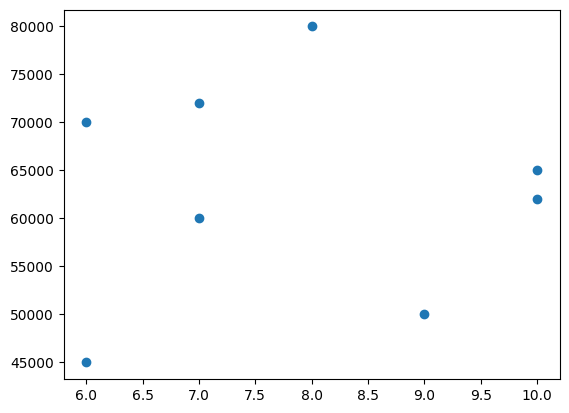

In [20]:
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])
#Then we can use lineaer regression model

In [21]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [22]:
reg.predict([[2,9,6]])
#prdeicted salary with 2year,9test,6interview

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [23]:
reg.predict([[12,10,10]])
#predicted salary with 12year,10test,10interview

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])